In [85]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np
import dask
from ncar_jobqueue import NCARCluster
import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 

from statistics import mean
from matplotlib import style
from scipy import stats

### A notebook to make monthly dust and BC deposition over the 1990 to 2009 period from the CMIP6 historical run

In [86]:
case='b.e21.BHIST.f09_g17.CMIP6-historical.001'
bc_var='ATM_BLACK_CARBON_FLUX_CPL'
dust_coarse_var='ATM_COARSE_DUST_FLUX_CPL'
dust_fine_var='ATM_FINE_DUST_FLUX_CPL'

### First do Black carbon deposition

In [87]:
BC_file='/glade/collections/cdg/timeseries-cmip6/' + case + '/ocn/proc/tseries/month_1/'+ case + '.pop.h.'+ bc_var + '.185001-201412.nc'
BC_file

'/glade/collections/cdg/timeseries-cmip6/b.e21.BHIST.f09_g17.CMIP6-historical.001/ocn/proc/tseries/month_1/b.e21.BHIST.f09_g17.CMIP6-historical.001.pop.h.ATM_BLACK_CARBON_FLUX_CPL.185001-201412.nc'

In [88]:
ds = xr.open_dataset(BC_file, decode_times=True, decode_coords=False)

In [89]:
ds["time"] = ds.time_bound.compute().mean(dim="d2")

In [90]:
ds['time']

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 13, 0, 0, 0, 3, 16),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, 5, 46),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, 6, 75), ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, 6, 289),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, 2, 320),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, 4, 350)], dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 13:00:00 ... 2014-12-16 12:00:00
Attributes:
    long_name:  boundaries for time-averaging interval

In [91]:
# just clip the dataset to only be from year 1990 to 2009
ds_new = ds.isel(time=slice(1880,1920))

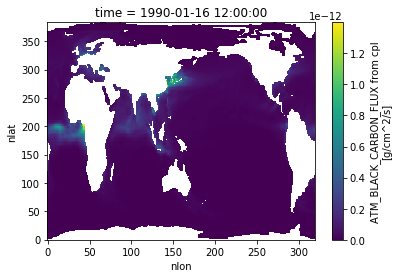

In [92]:
ds_new.ATM_BLACK_CARBON_FLUX_CPL.isel(time=0).plot()

In [93]:
ds_monthly_mean = ds_new.groupby('time.month').mean('time')

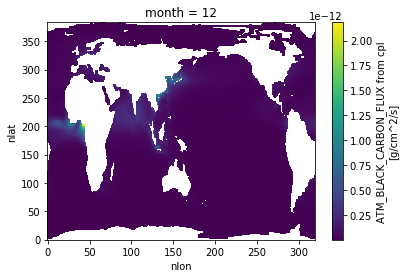

In [94]:
ds_monthly_mean.ATM_BLACK_CARBON_FLUX_CPL.isel(month=11).plot()

In [95]:
ds_monthly_mean['month']=[1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.]

In [96]:
file_out = '/glade/work/kristenk/tmp_outnetcdfs/'+case+'.'+bc_var+'.1990-2009_monthlyclim.nc'
ds_monthly_mean.to_netcdf(file_out)

### Now do Coarse dust deposition

In [97]:
dust_file='/glade/collections/cdg/timeseries-cmip6/' + case + '/ocn/proc/tseries/month_1/'+ case + '.pop.h.'+ dust_coarse_var + '.185001-201412.nc'

In [98]:
ds = xr.open_dataset(dust_file, decode_times=True, decode_coords=False)

In [99]:
ds["time"] = ds.time_bound.compute().mean(dim="d2")

In [100]:
# just clip the dataset to only be from year 1990 to 2009
ds_new = ds.isel(time=slice(1680,1920))

In [101]:
ds_monthly_mean = ds_new.groupby('time.month').mean('time')

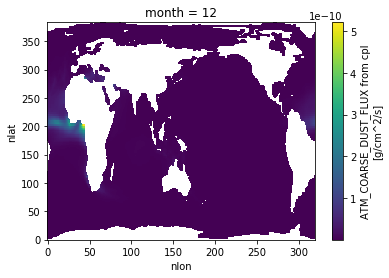

In [102]:
ds_monthly_mean[dust_coarse_var].isel(month=11).plot()

In [103]:
ds_monthly_mean['month']=[1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.]

In [104]:
file_out = '/glade/work/kristenk/tmp_outnetcdfs/'+case+'.'+dust_coarse_var+'.1990-2009_monthlyclim.nc'
ds_monthly_mean.to_netcdf(file_out)
file_out

'/glade/work/kristenk/tmp_outnetcdfs/b.e21.BHIST.f09_g17.CMIP6-historical.001.ATM_COARSE_DUST_FLUX_CPL.1990-2009_monthlyclim.nc'

### Now do fine dust deposition

In [105]:
dust_file='/glade/collections/cdg/timeseries-cmip6/' + case + '/ocn/proc/tseries/month_1/'+ case + '.pop.h.'+ dust_fine_var + '.185001-201412.nc'

In [106]:
ds = xr.open_dataset(dust_file, decode_times=True, decode_coords=False)

In [107]:
ds["time"] = ds.time_bound.compute().mean(dim="d2")

In [108]:
# just clip the dataset to only be from year 1990 to 2009
ds_new = ds.isel(time=slice(1680,1920))

In [109]:
ds_monthly_mean = ds_new.groupby('time.month').mean('time')

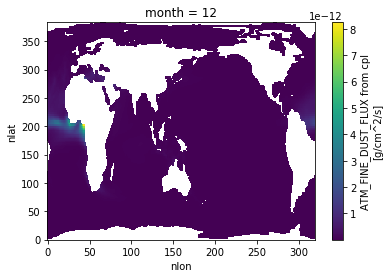

In [110]:
ds_monthly_mean[dust_fine_var].isel(month=11).plot()

In [111]:
ds_monthly_mean['month']=[1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.]

In [112]:
file_out = '/glade/work/kristenk/tmp_outnetcdfs/'+case+'.'+dust_fine_var+'.1990-2009_monthlyclim.nc'
ds_monthly_mean.to_netcdf(file_out)
file_out

'/glade/work/kristenk/tmp_outnetcdfs/b.e21.BHIST.f09_g17.CMIP6-historical.001.ATM_FINE_DUST_FLUX_CPL.1990-2009_monthlyclim.nc'